# Kings County House Sales Prediction


**Authors:** Maureen Kitanga, Samuel Kyalo, Priscila Kamiri, Leo Kariuki, Jimcollins Wamae & Steve Githinji
***

## Overview
Real estate developers in King County, Washington are interested in identifying factors that influence the sale price of homes in King County, as well as developing models to predict the sale price of homes based on these factors. To address this challenge, we undertook a data science project to develop a better model that could accurately predict the sale price of homes in the region.

Our analysis involved the examination of over 21,000 house sale transactions that occurred between May 2014 and May 2015. Using advanced machine learning techniques, we developed a progression of multiple models that outperformed the baseline model we initially used.  These models allowed us to identify the key features that drive property prices, including location, size, condition, and various other factors. This information can be used to optimize the design and marketing of new properties, identify investment opportunities, and make data-driven decisions about the development and sale of properties.
***

## Business Problem

The real estate developers in King County, Washington are facing a significant challenge in identifying the key factors that influence the sale of houses in the region. The developers need to identify these features that affect its sale price to make informed investment decisions and improve their construction process from start to finish. However, identifying this is a challenging task due to the large volume of data to be analyzed, including interdependent and correlated variables. Therefore, data science modeling techniques such as feature engineering and regression analysis are necessary to identify the most influential factors that drive property prices.

By leveraging these insights, the developers can improve their construction process and build homes that are more attractive to buyers, leading to increased sales and profits. Additionally, the insights can help developers understand the competitive landscape of the market, identify emerging trends and opportunities, and develop more effective marketing strategies to improve sales further. Ultimately, our work will contribute to the growth and development of the region's real estate market, leading to economic growth in the area.

***

### Problem Questions

* How does the size and quality of the property influence the sale price of homes in King County?
* How does the house neighborhood/location affect the prices?
* How accurately can we predict the sale price of homes in King County based on the available features?


## Data Undestanding

The King County House Sales dataset contains information on over 21,000 home sales in King County, Washington, USA between May 2014 and May 2015. The dataset includes a variety of features such as the number of bedrooms and bathrooms, the size of the property, the location of the property, and various other attributes that may influence the sale price of a home.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore") 

In [2]:
# Your code here - remember to use markdown cells for comments as well!
data = pd.read_csv('data/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Data Preparation

In [5]:
# Function to check the numeric and catergorical columns in the dataframe
def check_columns(data):
    #Create empty lists to store the names of numeric and categorical columns
    num_cols = []
    cat_cols = []
    
    # Looop through each column in the dataframe
    for col in data.columns:
        # if column contains numerical data, add to list of numeric columns
        if pd.api.types.is_numeric_dtype(data[col]):
            num_cols.append(col)
        # if column contains categoracal data, add to list of categorical columns
        if pd.api.types.is_object_dtype(data[col]):
            cat_cols.append(col)
    # Print out names of numeric and categorical data
    print()

In [6]:
#checking for missing values
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Duplicates

In [7]:
# Create a function that checks for duplicates values
def check_duplicates(column):
    return column.duplicated().value_counts()

In [8]:
check_duplicates(data)

False    21597
dtype: int64

### Missing Values


The `waterfront` column is a categorical column. The column has 2 unique values, 'YES' and 'NO' with 2376 missing values. As this is a fairly number of the total records, we shall be replacing the missing values with the mode of the column. The mode of the column is 'NO'. Therefore, we shall be replacing the missing values with 'NO'.


In [9]:
# Fill the missing values with the mode of the column(waterfront)
data['waterfront'] = data['waterfront'].fillna(data['waterfront'].mode()[0])

The `view` column is a categorical column. With 63 missing values, . As this is a small number of the total records, we shall be replacing  the records with mode,in this case 'NO'.

In [10]:
# Fill the missing values with the mode of the column(view)
data['view'] = data['view'].fillna(data['view'].mode()[0])

The `yr renovated` column is a numerical column with 3842 missing values. Futhermore, majority of the data in the records were zero. This could either be suggesting that the homes have never been renovated or that the data is erroneous. As there is no ideal way of daling with these values, it would be best to drop the entire column.

In [11]:
# Drop the 'yr_renovated' column
data.drop('yr_renovated', axis=1, inplace=True)

# Preview the first five rows of the dataframe
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


### Outliers

In [12]:
# Checking for outliers
def check_outliers(column):
    return sns.boxplot(column)

<AxesSubplot: >

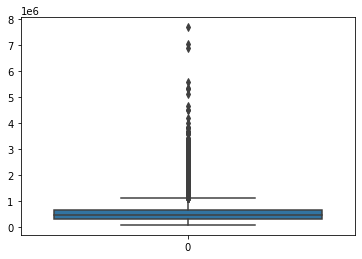

In [13]:
check_outliers(data['price'])

In [14]:
#Removing outliers in the price column


<AxesSubplot: >

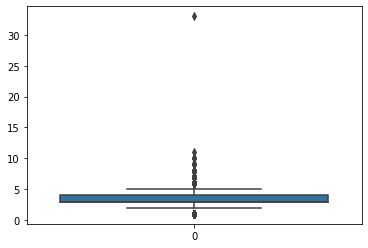

In [15]:
#Checking for outliers in the bedrooms column
check_outliers(data['bedrooms'])

In [16]:
#Removing outliers in the bedrooms column


<AxesSubplot: >

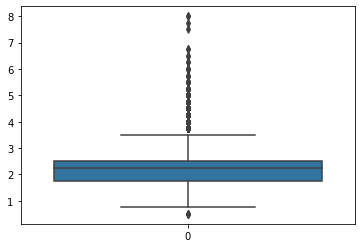

In [17]:
#Checking for outliers in the bathroom column
check_outliers(data['bathrooms'])

<AxesSubplot: >

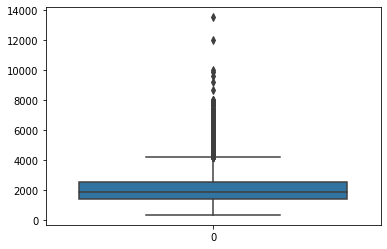

In [18]:
#Checking outliers in the sqft_living column
check_outliers(data['sqft_living'])

<AxesSubplot: >

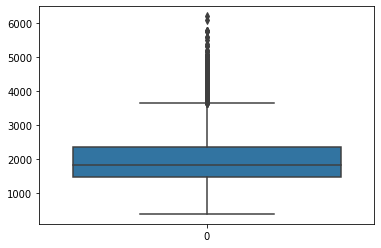

In [19]:
#Checking outliers in the sqft_lot column
check_outliers(data['sqft_living15'])

In [20]:
data=data.loc[(data['bedrooms']<6) & (data['bedrooms']>=2)]

data=data.loc[(data['bathrooms']<=3.5) & (data['bathrooms']>=0.5)]

data=data.loc[(data['price']<=3000000)]

data=data.loc[(data['sqft_living']<=6000)]

data=data.loc[(data['sqft_living15']<=5000)]

### Correlation Check

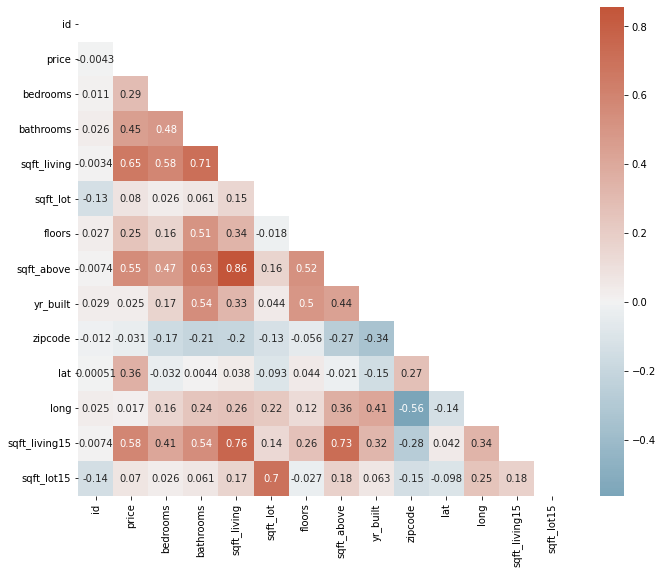

In [21]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(11,9))
sns.heatmap(corr, cmap=sns.diverging_palette(230, 20, as_cmap=True), mask = mask, annot=True, center=0);

Based on the correlation matrix generated from the dataset, we can see that the most strongly correlated feature with the target column `price` is `sqft_living` with a correlation coefficient of `0.7`. This suggests that there is a strong positive linear relationship between the living area of a house and its price. Houses with larger living areas are likely to have higher prices than those with smaller living areas.

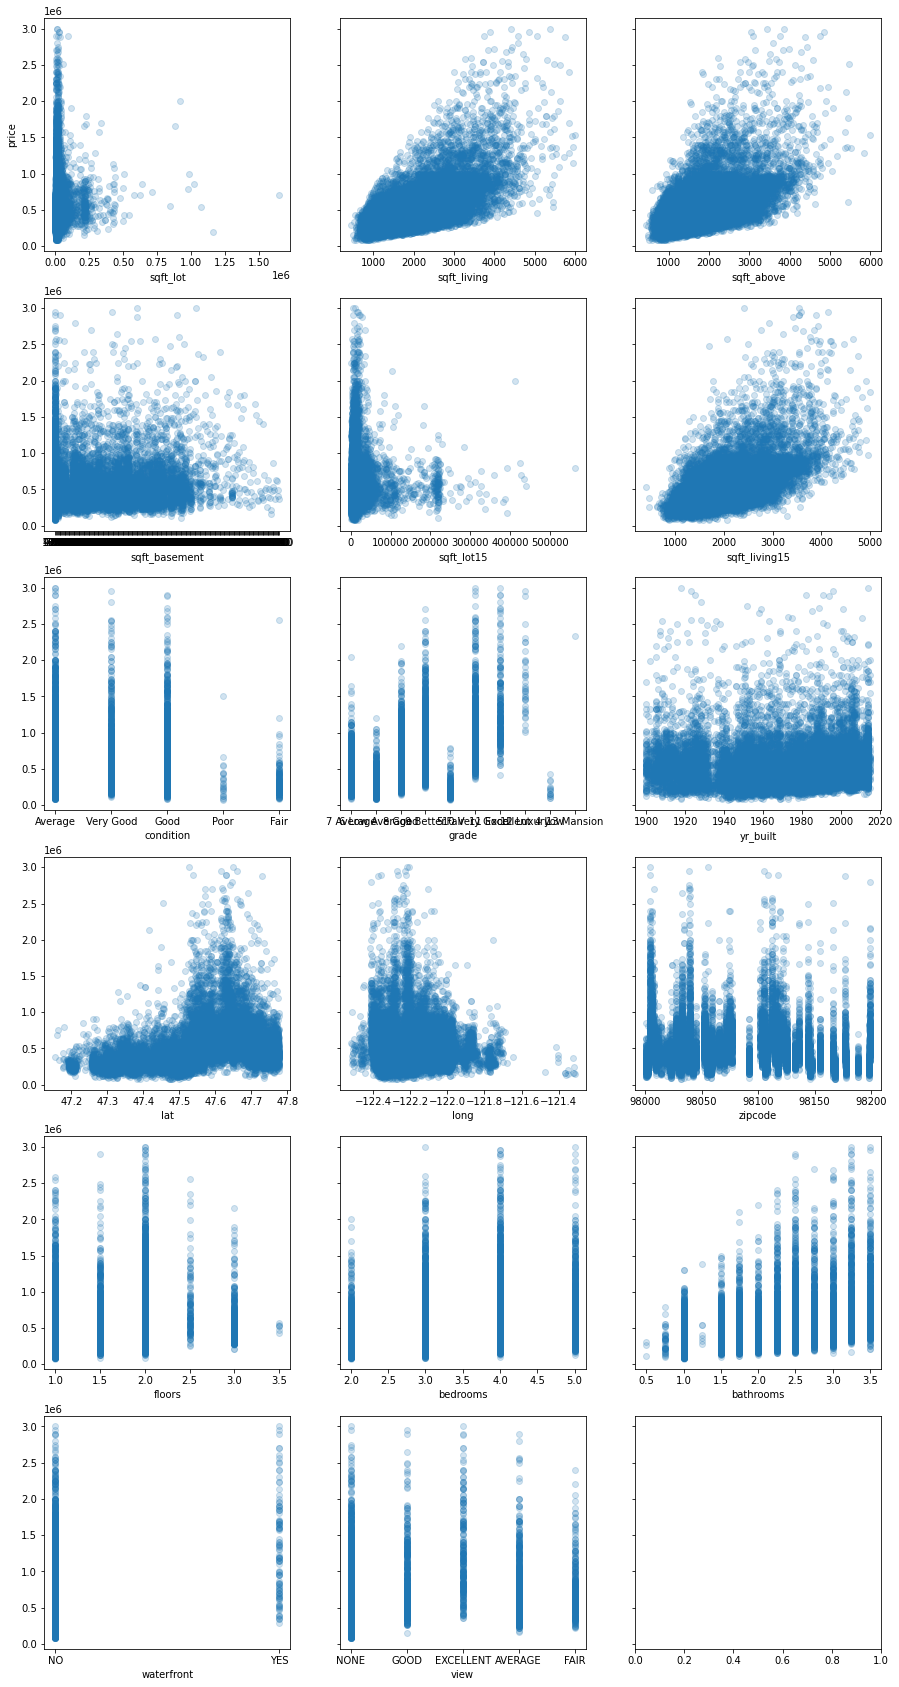

In [23]:
def plot_features(df, features):
    num_features = len(features)
    num_cols = min(num_features, 3)
    num_rows = (num_features + num_cols - 1) // num_cols
    
    fig, ax = plt.subplots(figsize=(5*num_cols, 5*num_rows), nrows=num_rows, ncols=num_cols, sharey=True)
    ax[0, 0].set_ylabel('price')
    
    i = 0
    for feature in features:
        ax[i//num_cols, i%num_cols].scatter(x=feature, y='price', data=df, alpha=0.2)
        ax[i//num_cols, i%num_cols].set_xlabel(feature)
        i += 1
    
    plt.show()

plot_features(data, ['sqft_lot', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15', 'condition', 'grade', 'yr_built', 'lat', 'long', 'zipcode', 'floors', 'bedrooms', 'bathrooms', 'waterfront', 'view'])


From the scatter plots generated above, some features seem to have a linear relationship with the target variable, price. These features are;
- `sqft_living`
- `sqft_above`
- `sqft_living15`
- `grade`
- `bathrooms`
- `bedrooms`

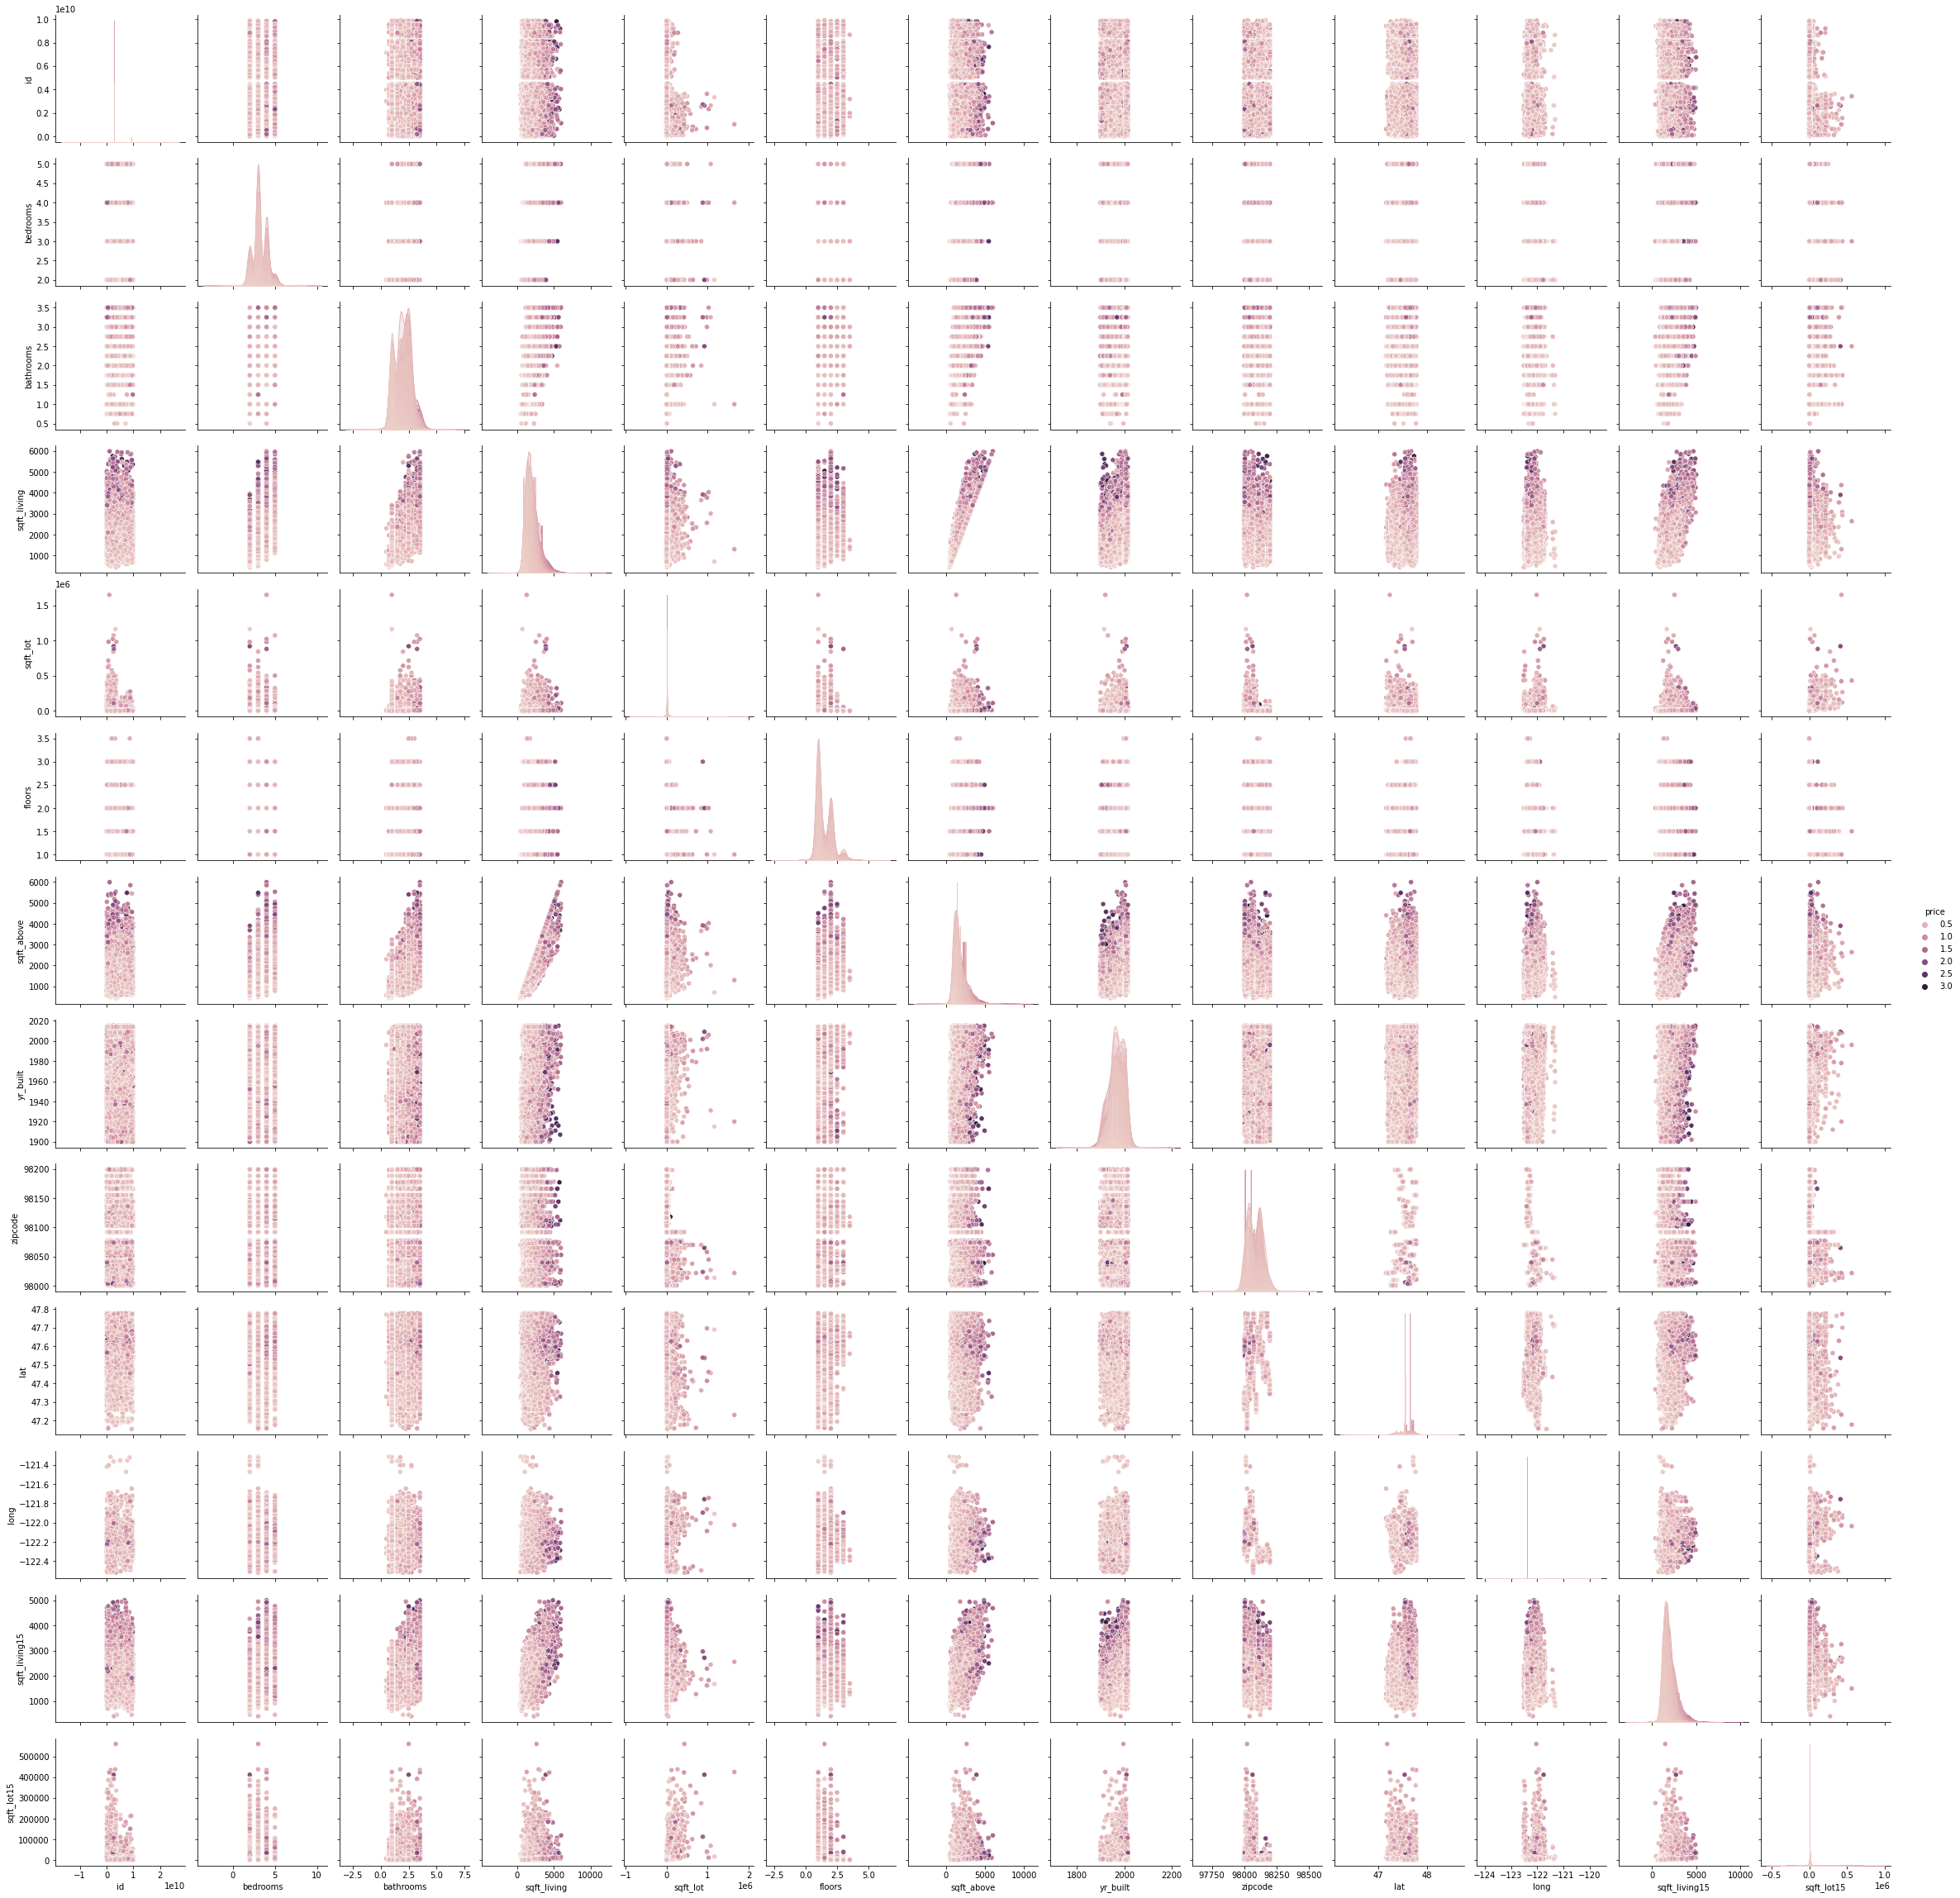

In [24]:
def check_pairwise_rltship(data):
    # pairwise relationship
    sns.pairplot(data, hue = "price")
    plt.show()

check_pairwise_rltship(data)

### Linear Transformation

To make the results of our model more inerpretable, a linear transformation is carried out convert the numeric values from Imperial to Metric System.

In [327]:
# Scaling the sqft_living predictor so that the units are sqm rather sqft.
data['sqft_living'] = data['sqft_living'] * 0.092903

# Scaling the sqft_living15 predictor so that the units are sqm rather sqft.
data['sqft_living15'] = data['sqft_living15'] * 0.092903

# Scaling the sqft_above redictor so that the units are sqm rather sqft.
data['sqft_above'] = data['sqft_above'] * 0.092903



# Scaling the sqft_above redictor so that the units are sqm rather sqft.
data['sqft_lot'] = data['sqft_lot'] * 0.092903

# Scaling the sqft_above redictor so that the units are sqm rather sqft.
data['sqft_lot15'] = data['sqft_lot15'] * 0.092903

# Renaming the transformed columns to sqm
data.rename(columns={'sqft_living': "sqm_living"},inplace=True)
data.rename(columns={'sqft_living15': "sqm_living15"},inplace=True)
data.rename(columns={'sqft_above': "sqm_above"},inplace=True)
data.rename(columns={'sqft_lot': "sqm_lot"},inplace=True)
data.rename(columns={'sqft_lot15': "sqm_lot15"},inplace=True)
            
data.tail()

,id,date,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqft_basement,yr_built,zipcode,lat,long,sqm_living15,sqm_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,142.14159,105.073293,3.0,NO,NONE,Average,8 Good,142.14159,0.0,2009,98103,47.6993,-122.346,142.14159,140.190627
21593,6600060120,2/23/2015,400000.0,4,2.50,214.60593,540.045139,2.0,NO,NONE,Average,8 Good,214.60593,0.0,2014,98146,47.5107,-122.362,170.01249,668.901600
21594,1523300141,6/23/2014,402101.0,2,0.75,94.76106,125.419050,2.0,NO,NONE,Average,7 Average,94.76106,0.0,2009,98144,47.5944,-122.299,94.76106,186.456321
21595,291310100,1/16/2015,400000.0,3,2.50,148.64480,221.852364,2.0,NO,NONE,Average,8 Good,148.64480,0.0,2004,98027,47.5345,-122.069,130.99323,119.566161
21596,1523300157,10/15/2014,325000.0,2,0.75,94.76106,99.963628,2.0,NO,NONE,Average,7 Average,94.76106,0.0,2008,98144,47.5941,-122.299,94.76106,126.069371


### Log Transformations

Applying log transformation, we will be able to model a linear relationship between the transformed variables, even though there wasn't a linear relationship between the raw, un-transformed variables.


Text(0.5, 0, 'price')

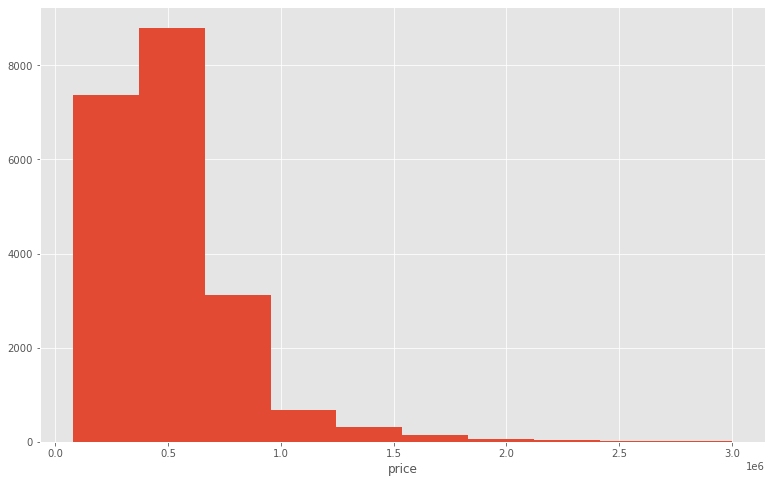

In [328]:
# Checking for normality in the price column
fig, ax1 = plt.subplots(figsize=(13,8))
ax1.hist(data["price"])
ax1.set_xlabel("price")

Looking at the distribution of `price` above, a log transformation is applicable.

Text(0.5, 0, 'Log_price')

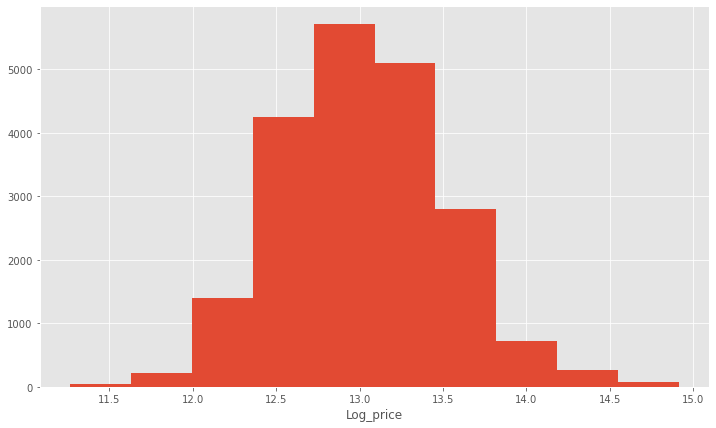

In [329]:
# Log transforming the target
data['log_price']= np.log(data['price'])

# Plotting the log transformed variable
fig, ax1 = plt.subplots(figsize=(12,7))
ax1.hist(data["log_price"])
ax1.set_xlabel("Log_price")

The `log_price` column is now 'more normal' than the original `price` column, thereby passing the normality assumption.

### One-Hot Encoding

In order to use a categorical variable in our model, we'll create multiple dummy variables, one for each category of the categorical variable.

In [330]:
# Create dummy variables and avoid dummy variable trap by dropping one of the dummy variables
condition_data = data[['sqm_living', 'sqm_living15', 'sqm_above', 
                       'bedrooms', 'bathrooms', 'sqm_lot', 'sqm_lot15', 'condition']].copy()
condition_data = pd.get_dummies(condition_data, columns=['condition'], drop_first=True)
condition_data

,sqm_living,sqm_living15,sqm_above,bedrooms,bathrooms,sqm_lot,sqm_lot15,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,109.62554,124.49002,109.62554,3,1.00,524.901950,524.901950,0,0,0,0
1,238.76071,157.00607,201.59951,3,2.25,672.803526,709.686017,0,0,0,0
2,71.53531,252.69616,71.53531,2,1.00,929.030000,748.983986,0,0,0,0
3,182.08988,126.34808,97.54815,4,3.00,464.515000,464.515000,0,0,0,1
4,156.07704,167.22540,156.07704,3,2.00,750.656240,697.051209,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21592,142.14159,142.14159,142.14159,3,2.50,105.073293,140.190627,0,0,0,0
21593,214.60593,170.01249,214.60593,4,2.50,540.045139,668.901600,0,0,0,0
21594,94.76106,94.76106,94.76106,2,0.75,125.419050,186.456321,0,0,0,0
21595,148.64480,130.99323,148.64480,3,2.50,221.852364,119.566161,0,0,0,0


In [331]:
# Create dummy variables and avoid dummy variable trap by dropping one of the dummy variables
grade_data = data[['sqm_living', 'sqm_living15', 'sqm_above', 'bedrooms', 'bathrooms', 'sqm_lot', 'sqm_lot15',
                   'grade']].copy()
grade_data = pd.get_dummies(grade_data, columns=["grade"], drop_first=True)
grade_data

,sqm_living,sqm_living15,sqm_above,bedrooms,bathrooms,sqm_lot,sqm_lot15,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,109.62554,124.49002,109.62554,3,1.00,524.901950,524.901950,0,0,0,0,0,0,1,0,0
1,238.76071,157.00607,201.59951,3,2.25,672.803526,709.686017,0,0,0,0,0,0,1,0,0
2,71.53531,252.69616,71.53531,2,1.00,929.030000,748.983986,0,0,0,0,0,1,0,0,0
3,182.08988,126.34808,97.54815,4,3.00,464.515000,464.515000,0,0,0,0,0,0,1,0,0
4,156.07704,167.22540,156.07704,3,2.00,750.656240,697.051209,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,142.14159,142.14159,142.14159,3,2.50,105.073293,140.190627,0,0,0,0,0,0,0,1,0
21593,214.60593,170.01249,214.60593,4,2.50,540.045139,668.901600,0,0,0,0,0,0,0,1,0
21594,94.76106,94.76106,94.76106,2,0.75,125.419050,186.456321,0,0,0,0,0,0,1,0,0
21595,148.64480,130.99323,148.64480,3,2.50,221.852364,119.566161,0,0,0,0,0,0,0,1,0


## Modelling

### Simple Linear Regression


We will use simple linear regression as our baseline model. The regression will be between two variables , the sale price as the dependent variable and the Square footage of living space in the home as the independent variable in our model.

In [332]:
#importing the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style


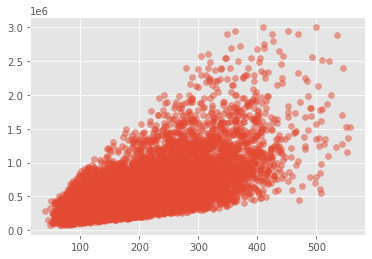

In [333]:
# Assigning values of the variables
X = data[['sqm_living']]
y = data['price']

plt.scatter(X, y, alpha=0.5);

From the scatter plot we identified that the relationship is linear

In [334]:

baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                 1.553e+04
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:28:39   Log-Likelihood:                -8935.8
No. Observations:               20582   AIC:                         1.788e+04
Df Residuals:                   20580   BIC:                         1.789e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2029      0.007   1726.305      0.0

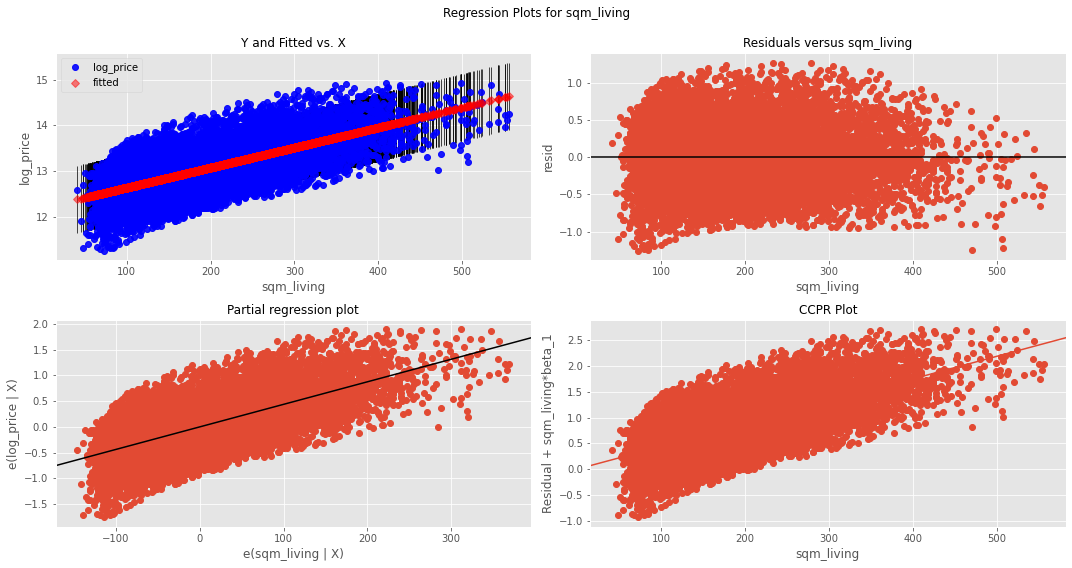

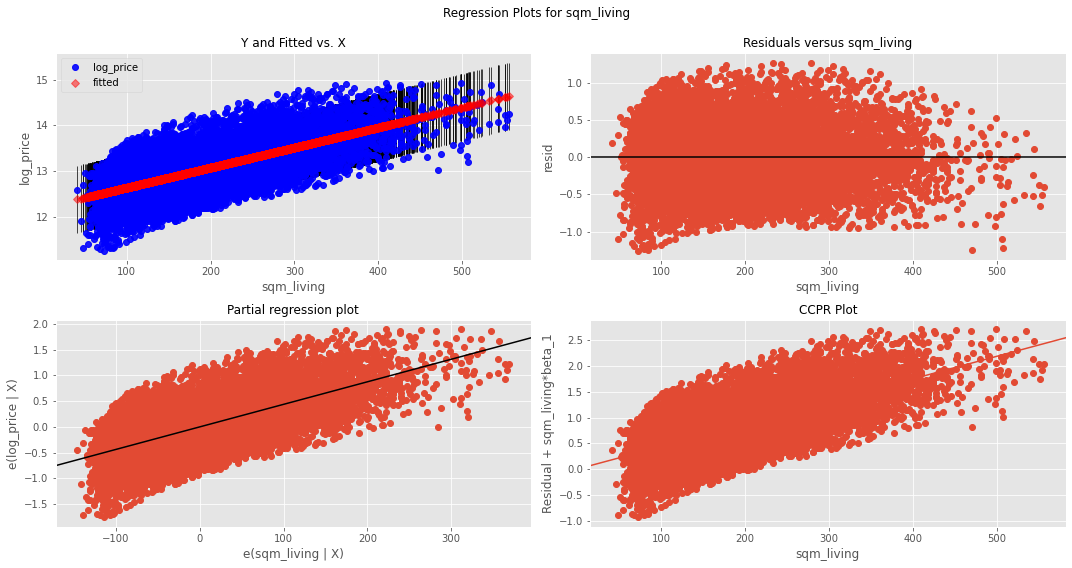

In [335]:
# Plot partial regression plot for the feature
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(
    baseline_results,
    'sqm_living',
    fig=fig)

### Baseline Model Evaluation and Interpretation

The baseline model is statistically significant overall, and explains about 43% of the variance in price.

The coefficients for the intercept, `sqm_living` is statistically significant.

* The overall formula is y = 280.86x - 43988.89.
* For a house with 0 Square footage of living space we would expect a sale price would be 12.20
* Every increase of 1 in Square footage of living space in the home is associated with an increase of 0.0044 in the Sale price .

### Multiple Linear Regression Plot

In [336]:
X_all = grade_data.drop(['sqm_above', 'sqm_living15'], axis=1)
              
multiple_model_1 = sm.OLS(y, sm.add_constant(X_all))
multiple_results_1 = multiple_model_1.fit()
print(multiple_results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1581.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:28:45   Log-Likelihood:            -2.8080e+05
No. Observations:               20582   AIC:                         5.616e+05
Df Residuals:                   20567   BIC:                         5.617e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6.382e+05    

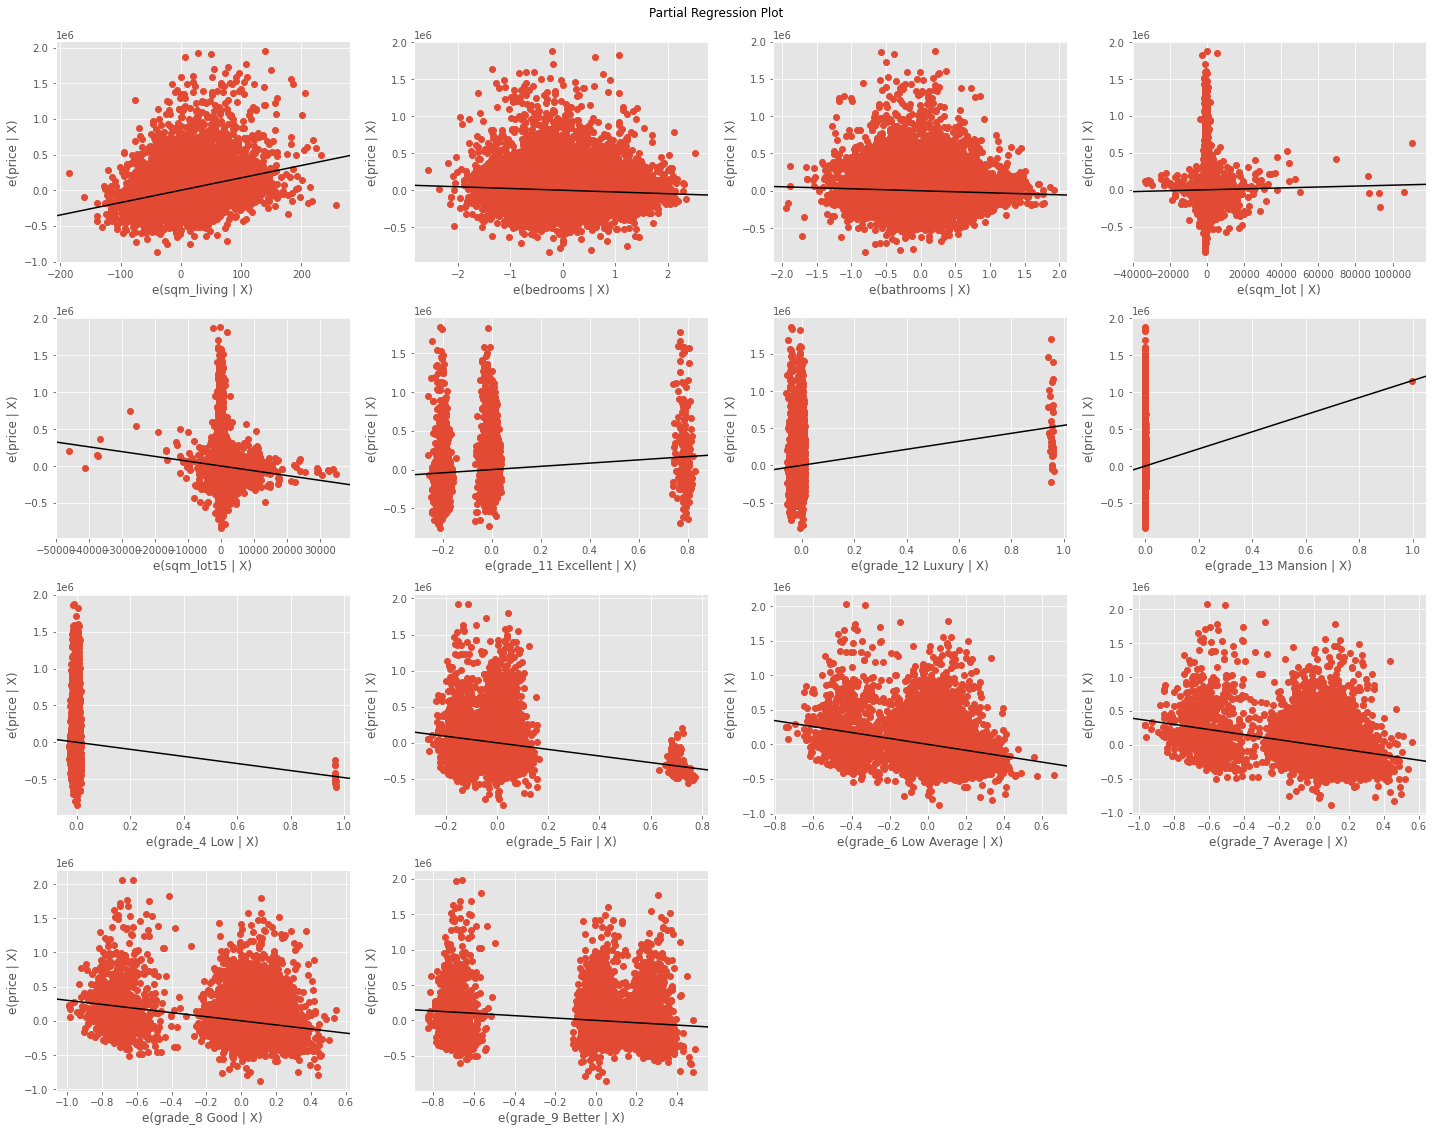

In [337]:
fig = plt.figure(figsize=(20,16))
sm.graphics.plot_partregress_grid(
                    multiple_results_1,
                    exog_idx=list(X_all.columns.values),
                    grid=(4,4),
                    fig=fig)
plt.show();

In [242]:
X_all_2 = condition_data
              
multiple_model_2 = sm.OLS(y, sm.add_constant(X_all_2))
multiple_results_2 = multiple_model_2.fit()
print(multiple_results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     1676.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:55:04   Log-Likelihood:            -2.8173e+05
No. Observations:               20582   AIC:                         5.635e+05
Df Residuals:                   20570   BIC:                         5.636e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.299e+04   7

## Regression Results

##  Conclusion